# Semantic Factors
This notebook aims for an exploratory factor analysis (EFA) on the "Glasgow Norms" -- a database with 5,553 English words classified into nine psycholinguistics dimensions (SCOTT, 2016).  

This analysis is part of the Ph.D thesis of Tiago B. N. Silveira.  
UTFPR, Brazil. 2023-11.  


## References: 
Scott, G. G., Keitel, A., Becirspahic, M., Yao, B., & Sereno, S. C. (2019). The Glasgow Norms: Ratings of 5,500 words on nine scales. Behavior Research Methods, 51(3), 1258–1270. https://doi.org/10.3758/s13428-018-1099-3

## Introduction

### Libraries

In [1]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [2]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
The Glasgow Norms (SCOTT, 2016) are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [3]:
## Reading the dataset file:
glasgow = pd.read_csv('../data/GlasgowR_pandas_ready.csv')
glasgow.set_index('words', inplace=True)
glasgow.head(2)

length  AROU_M  AROU_SD  AROU_N  VAL_M  VAL_SD  VAL_N  DOM_M  \
words                                                                    
abattoir       8   4.200    2.400      25  2.864   1.740     22  4.333   
abbey          5   3.125    2.342      32  5.781   1.268     32  4.667   

          DOM_SD  DOM_N  CNC_M  CNC_SD  CNC_N  IMAG_M  IMAG_SD  IMAG_N  FAM_M  \
words                                                                           
abattoir   1.285     21  5.455   1.900     22   4.391    2.121      23  2.382   
abbey      1.551     33  5.906   1.508     32   5.344    1.881      32  3.324   

          FAM_SD  FAM_N  AOA_M  AOA_SD  AOA_N  SIZE_M  SIZE_SD  SIZE_N  \
words                                                                    
abattoir   1.799     34  6.760   0.427     25   4.652    1.549      23   
abbey      1.810     34  5.177   1.339     34   5.121    1.629      33   

          GEND_M  GEND_SD  GEND_N  
words                              
abattoir   5.391    1.170      23  
abbey      3.303    1.193      33

### Selecting data of interest:

Since GEND was generated through a Likert scale, but contains not a quantifiable measure but a categorical one, it will not be selected for the factor analysis.

In [33]:
## Defining labels of interest (Mean and StdDev for each dimension)
label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M']
label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD']
    

In [93]:
## Creating a copy of the original dataset:
df = glasgow.copy()
df = df[label_M + label_SD]
df.head()

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  \
words                                                                   
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   

            AROU_SD  VAL_SD  DOM_SD  CNC_SD  IMAG_SD  FAM_SD  AOA_SD  SIZE_SD  
words                                                                          
abattoir      2.400   1.740   1.285   1.900    2.121   1.799   0.427    1.549  
abbey         2.342   1.268   1.551   1.508    1.881   1.810   1.339    1.629  
abbreviate    1.582   1.031   1.238   1.733    1.689   1.838   1.130    1.700  
abdicate      1.941   1.383   2.182   1.853    1.521   2.077   0.844    1.441  
abdication    2.282   1.608   1.960   1.620    1.294   2.022   0.913    1.351

----
## Exploratory Data Analysis of psycholinguistics dimensions

#### Correlation between dimensions (based on means)

<Axes: >

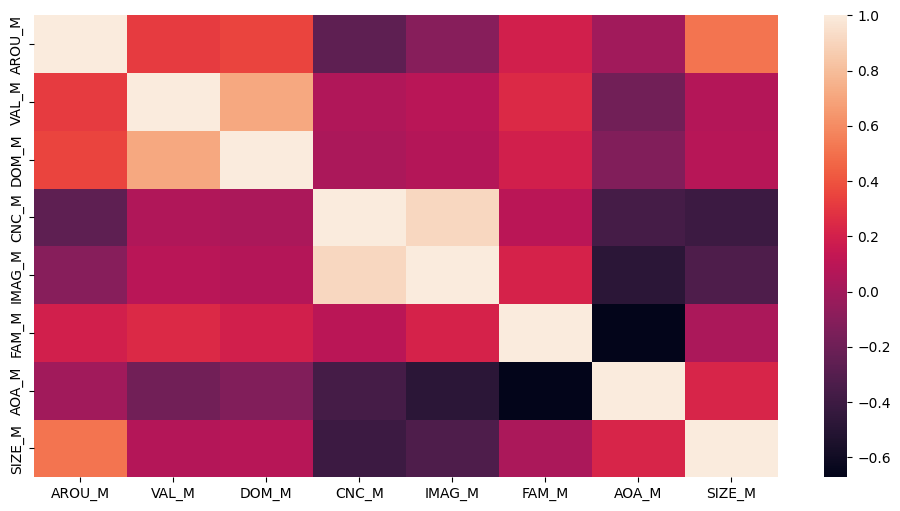

In [35]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(12,6))
c= df[label_M].corr()
sns.heatmap(c)

### Visualizing features with confidence interval:

In [36]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf

In [38]:
def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

#### Experimenting some words visualization:

In [39]:
df.loc['man'].to_frame().T

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  AROU_SD  \
man   5.657  5.486  6.029  6.088   6.629  6.677  1.657   4.647    2.629   

     VAL_SD  DOM_SD  CNC_SD  IMAG_SD  FAM_SD  AOA_SD  SIZE_SD  
man   1.538   2.443   1.245    1.071    0.83   0.674     1.73

In [40]:
## Comparing elephant (High SIZE) and worm (Low SIZE)
fig_ex = viz_GlasgowR(['man'], df)
fig_ex

In [149]:
## Comparing elephant (High SIZE) and worm (Low SIZE)
fig_ex = viz_GlasgowR(['child','human','person'], df)
fig_ex

In [161]:
## Comparing elephant (High SIZE) and worm (Low SIZE)
fig_ex = viz_GlasgowR(['wound','suffering','anxiety','fear'], df)
fig_ex

---
### Scaling data for VAL and DOM attributes
Analyzing the nine psycholinguistic variables that make up the Glasgow Norms, it is observed that the attributes VAL and DOM measure dimensions whose extremes represent a quantity of opposite magnitude so that the neutrality of this dimension is found in a central position.

The CNC dimension for concreteness, for example: at its minimum value, means the absence of concreteness, while at its maximum value, the highest concreteness. On the other hand, in the VAL variable, the positive or negative valence is found at the maximum and minimum values, respectively, but with neutrality centered.

For the factor analysis that we wish to employ, there is greater theoretical consistency if we consider the absence or absence of emotional valence, regardless of whether it is positive or negative. Therefore, for these two dimensions (VAL and DOM), we will standardize their values based on the average value of the Lickert scale used -- in the case of 9 points, we will consider the average as value 5. To do so, we will employ a specific scaler:

*Simple Customized scaler for 9-points Lickert scale:*  

$y_{\text{simple}} = (x-5)^2$

In [169]:
def simple_custom_NinePoints_Scaler(serie: pd.Series, central_val: float = 5):
    y = (serie - central_val)**2
    return y

*Smooth Customized scaler for 9-points Lickert scale:*  

$y_{\text{smooth}} = \log(1+\epsilon(x-5)^4)$,  
where $\epsilon$ is the smoothness parameter varying from 1.0 to 10,000.

In [170]:
def smooth_custom_NinePoints_Scaler(serie: pd.Series, central_val: float = 5., smoothParameter: float = 1.):
    y = np.log(1 + smoothParameter*(serie - central_val)**4)
    return y

In [171]:
## Experimenting with the custom scaler:    
ex_smooth = smooth_custom_NinePoints_Scaler(pd.Series(data=[1,2,3,4,5,6,7,8,9], index=[1,2,3,4,5,6,7,8,9]), 5., 50.)
ex_simple = simple_custom_NinePoints_Scaler(pd.Series(data=[1,2,3,4,5,6,7,8,9], index=[1,2,3,4,5,6,7,8,9]), 5.)
pd.DataFrame({'smooth': ex_smooth, 'simple': ex_simple})

smooth  simple
1  9.457279    16.0
2  8.306719     9.0
3  6.685861     4.0
4  3.931826     1.0
5  0.000000     0.0
6  3.931826     1.0
7  6.685861     4.0
8  8.306719     9.0
9  9.457279    16.0

#### Comparing the original values with the scaled ones:

In [186]:
## Creating a dataframe for comparison:
vars_raw = glasgow[['VAL_M', 'DOM_M']].rename(columns={'VAL_M': 'VAL_raw', 'DOM_M': 'DOM_raw'})
vars_smooth = df[['VAL_M', 'DOM_M']].rename(columns={'VAL_M': 'VAL_smooth', 'DOM_M': 'DOM_smooth'})

vars_compared = pd.concat([vars_raw, vars_smooth], axis=1)
vars_compared = vars_compared[['VAL_raw', 'VAL_smooth', 'DOM_raw', 'DOM_smooth']]
vars_compared.describe().loc[['count', 'mean', 'std', 'min', 'max']]

VAL_raw   VAL_smooth      DOM_raw   DOM_smooth
count  5553.000000  5553.000000  5553.000000  5553.000000
mean      5.095874     3.854152     5.065290     2.282996
std       1.545788     2.930328     0.909191     2.225143
min       1.030000     0.000000     1.941000     0.000000
max       8.647000     9.427168     8.371000     8.773016

#### Applying the customized scaler for VAL and DOM dimensions:

In [47]:
## Applying the SIMPLE custom scaler to VAL and DOM dimensions:
#df['VAL_M'] = simple_custom_NinePoints_Scaler(df['VAL_M'], 5.0)
#df['DOM_M'] = simple_custom_NinePoints_Scaler(df['DOM_M'], 5.0)

In [97]:
## Applying the SMOOTH custom scaler to VAL and DOM dimensions:
df['VAL_M'] = smooth_custom_NinePoints_Scaler(df['VAL_M'], 5.0, 50.)
df['DOM_M'] = smooth_custom_NinePoints_Scaler(df['DOM_M'], 5.0, 50.)

In [98]:
## Comparing elephant (High SIZE) and worm (Low SIZE)
fig_ex2 = viz_GlasgowR(['elephant','worm'], df)
fig_ex2

----
## Exploratory Factor Analysis

In [99]:
from factor_analyzer import FactorAnalyzer

### Adjusting the data for analysis (df_M)
We will apply a factor analysis only to the means, i.e., we will  not consider the standard deviation for each psycholinguistic dimension since variance is determined by factory analysis.

In [100]:
df_M = df[label_M]
df_M.head()

AROU_M     VAL_M     DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M
words                                                                      
abattoir     4.200  6.948723  2.388424  5.455   4.391  2.382  6.760   4.652
abbey        3.125  2.975663  0.479223  5.906   5.344  3.324  5.177   5.121
abbreviate   3.273  0.178408  0.141925  3.286   3.177  5.121  5.543   2.667
abdicate     4.194  4.758440  1.901715  3.367   2.516  3.971  6.233   4.679
abdication   3.846  4.377968  0.076961  3.292   2.571  3.097  6.407   5.083

#### Applying a Standard Scaler to data:

In [101]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

scaled_df_M=df_M.copy()
scaled_df_M=pd.DataFrame(scaler.fit_transform(scaled_df_M),
                         columns=df_M.columns,
                         index=df_M.index)
scaled_df_M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, abattoir to zoology
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AROU_M  5553 non-null   float64
 1   VAL_M   5553 non-null   float64
 2   DOM_M   5553 non-null   float64
 3   CNC_M   5553 non-null   float64
 4   IMAG_M  5553 non-null   float64
 5   FAM_M   5553 non-null   float64
 6   AOA_M   5553 non-null   float64
 7   SIZE_M  5553 non-null   float64
dtypes: float64(8)
memory usage: 519.5+ KB


In [103]:
## Observing samples from scaled data:
scaled_df_M.head()

AROU_M     VAL_M     DOM_M     CNC_M    IMAG_M     FAM_M  \
words                                                                    
abattoir   -0.389836  1.056145  0.047385  0.573640 -0.294028 -3.102087   
abbey      -1.370862 -0.299819 -0.810706  0.892080  0.412861 -2.085543   
abbreviate -1.235799 -1.254493 -0.962304 -0.957837 -1.194514 -0.146339   
abdicate   -0.395312  0.308624 -0.171367 -0.900645 -1.684811 -1.387343   
abdication -0.712890  0.178773 -0.991502 -0.953601 -1.644015 -2.330506   

               AOA_M    SIZE_M  
words                           
abattoir    2.113254  0.552909  
abbey       0.838995  1.012206  
abbreviate  1.133612 -1.391025  
abdicate    1.689038  0.579350  
abdication  1.829102  0.974992

### Checking adequacy for EFA
Reference:  
(TOTH, 2023): TOTH, Gellert. DataSklr. Blog available in "https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis". Accessed in 2023.

In [104]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


> ``Bartlett Sphericity  Test is a check of intercorrelation between manifest variables, which means the comparison of the observed correlation matrix and the identity matrix.  If factor analysis is an appropriate method to use, the correlation matrix and the identity matrix will not be the same, and the test will be significant. Luckily, the Bartlett Sphericity Test based on [our] data produced a significant p-value of 0.0.'' (TOTH, 2023)

In [105]:
#CHECKING ADEQUACY - Bartlett Sphericity Test
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df_M)
print('Chi Square Value: ',chi_square_value,'\np-value: ', p_value)

Chi Square Value:  23365.504279455723 
p-value:  0.0


> ``The KMO test (Kaiser-Meyer-Olkin) should test whether it is appropriate to use the manifest variables for factor analysis. The test involves the computation of the proportion of variance among the manifest variables.  The KMO values range between 0-1 and a proportion under 0.6 would suggest that the dataset is inappropriate for factor analysis.'' (TOTH, 2023)

In [187]:
#CHECKING ADEQUACY - KMO
#Value should be > 0.6
kmo_all,kmo_model=calculate_kmo(scaled_df_M)
print(f'KMO value: {kmo_model:2.2}')

KMO value: 0.66


### EFA Estimator

In [188]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()

## fa.fit(df_M)
fa.fit(scaled_df_M)


FactorAnalyzer(rotation_kwargs={})

In [189]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([3.09139349, 2.00122119, 0.9524925 , 0.74247037, 0.49166712,
       0.39359049, 0.2597272 , 0.06743764])

#### Scree Plot
Factors with eigenvalue $\leq 1$ are no more informative than a single variable. They bring equal or less information than a single variable alone.

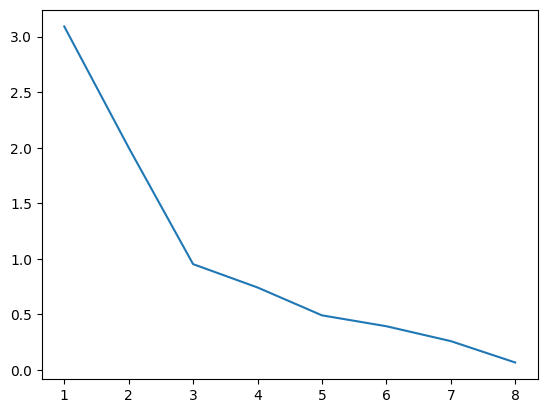

In [190]:
plt.plot(range(1,scaled_df_M.shape[1]+1),ev)

In [194]:
import matplotlib

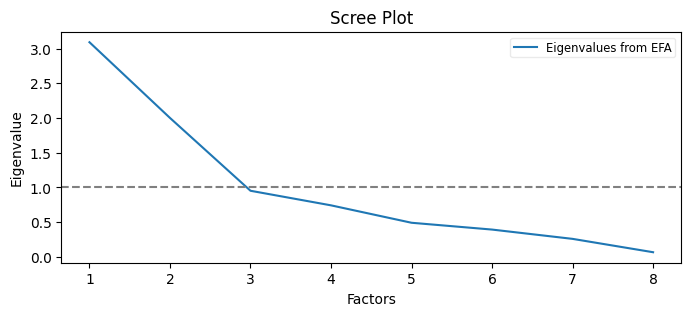

In [198]:
fig = plt.figure(figsize=(8,3))
plt.plot(range(1,scaled_df_M.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

# Adiciona uma linha horizontal tracejada em y=1.0
plt.axhline(y=1.0, linestyle='--', color='gray')

leg = plt.legend(['Eigenvalues from EFA'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

#### Choosing three factors and analyzing their structure:
- We choose a configuration of 3 factors, based on the scree plot above, and the oblique rotation "oblimin", since we assume the dimensions are not orthogonal, i.e., they are not independent.  
    - According to (TOTH, 2023): ``Oblimin: Attempts a simple factor pattern matrix structure by using a parameter that controls the degree of correlation among factors. Finds the best structure while minimizing a.) power loadings and b.) the correlation between factors. Analysts can set the magnitude of the correlation between the factors.''

In [191]:
fa = FactorAnalyzer(3, rotation='oblimin')
fa.fit(scaled_df_M)
loads = fa.loadings_
print(loads)

[[ 1.00533596e-01  7.66473138e-01 -5.32331606e-04]
 [-5.62893102e-02  7.17347973e-01 -3.11011465e-02]
 [-1.41355648e-01  5.13557214e-01 -3.82326697e-02]
 [ 8.89827758e-01 -1.44661365e-01  3.32293093e-02]
 [ 1.01032828e+00  9.15914624e-02 -3.90950352e-02]
 [-4.30422848e-02  1.88115060e-01 -7.03988538e-01]
 [-2.82452304e-02  7.41482553e-02  9.85521256e-01]
 [-1.02300011e-01  5.90176161e-01  1.32671036e-01]]


#### Analyzing the factor structure:

In [192]:
def highlight_high_values(val, th=0.5):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    # color = 'background-color: yellow' if ((val > th) or (val < -th)) else ''
    if (val > th):
        color = 'background-color: yellow' 
    elif (val < -th):
        color = 'background-color: red'
    else:
        color = ''
    return color

In [112]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[scaled_df_M.columns])

In [113]:
factors.style.map(highlight_high_values, th=0.5)

#### Discussion regarding Factor Analysis:
- As expected, it seems **Factor 1** may relate to objectivity:  
    > It is strongly related to concreteness; and  
    > It is strongly related to imageability, i.e., how ones can easily imagine or picture a given concept.

- **Factor 2**, on the other hand, seems to relate to subjectivity, strongly influenced by arousal, valence, and dominance. It is also related so semantic size.  

- A third factor emerges from these data, **Factor 3**, mostly negativaly related to familiarity and influenced by age of acquisition. This factor can be theoretically associated to context.

In [114]:
## Based on the previous discussing, we name these factors as:
factors_name = ['F_Objectivity','F_Subjectivity','F_Context']

---
#### Calculating Factor Variance:

In [115]:
## Calculating the SumSquared Loading (variance):
variance_metrics = fa.get_factor_variance()

pd.DataFrame(variance_metrics, columns=factors_name, index=['SumSquared Loadings','Proportional Var','Cumulative Var'])

F_Objectivity  F_Subjectivity  F_Context
SumSquared Loadings       1.858929        1.784319   1.489516
Proportional Var          0.232366        0.223040   0.186189
Cumulative Var            0.232366        0.455406   0.641596

> The "Cumulative Variance" above indicates that ~64% of the variance of the data is explained by these three factors.

#### Getting communalities  
References:  
- [A] https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis/  
- [B] https://medium.com/analytics-vidhya/the-factor-analysis-for-constructing-a-composite-index-2496686fc54c

``From the commonality column, we can know how much variance is explained by the first factor out of the total variance.'' [A]  

``Communality is the proportion of each variable's variance that can be explained by the factors.'' [B]

In [116]:
df_communalities = pd.DataFrame(data = {'Column': scaled_df_M.columns, 'Communality': fa.get_communalities()})
df_communalities.style.map(highlight_high_values, subset = ['Communality'])

---
### Creating the latent variables:

In [117]:
scores = pd.DataFrame(fa.transform(scaled_df_M), columns=factors_name, index=scaled_df_M.index)
scores.head()

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir        -0.199523       -0.140124   2.146430
abbey            0.560175       -0.818961   0.891782
abbreviate      -1.046886       -1.155135   1.228130
abdicate        -1.581116       -0.122218   1.684300
abdication      -1.495024       -0.365440   1.843848

In [118]:
scores.describe()

F_Objectivity  F_Subjectivity     F_Context
count   5.553000e+03    5.553000e+03  5.553000e+03
mean    1.151609e-17    5.118262e-18  2.815044e-17
std     9.980333e-01    8.966101e-01  9.987745e-01
min    -2.124809e+00   -1.983667e+00 -2.413521e+00
25%    -8.936669e-01   -7.201982e-01 -7.972081e-01
50%    -2.422041e-03   -8.225483e-02  1.680201e-02
75%     9.686254e-01    6.561279e-01  7.930253e-01
max     1.631646e+00    2.860076e+00  2.334125e+00

#### Standardizing the factor socores between [0-1]

In [119]:
# Module for standardization
from sklearn.preprocessing import MinMaxScaler

In [120]:

# Standardize the factors
scaler = MinMaxScaler()
df_factors = pd.DataFrame(data = scaler.fit_transform(scores),
                                 index = scores.index,
                                 columns = factors_name)

In [121]:
df_factors.describe()

F_Objectivity  F_Subjectivity    F_Context
count    5553.000000     5553.000000  5553.000000
mean        0.565642        0.409532     0.508362
std         0.265685        0.185107     0.210373
min         0.000000        0.000000     0.000000
25%         0.327740        0.260846     0.340445
50%         0.564997        0.392550     0.511901
75%         0.823498        0.544991     0.675397
max         1.000000        1.000000     1.000000

In [122]:
df_factors.head()

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         0.512527        0.380603   0.960466
abbey            0.714765        0.240456   0.696198
abbreviate       0.286952        0.171052   0.767043
abdicate         0.144736        0.384300   0.863127
abdication       0.167654        0.334086   0.896733

---
## Evaluating factor distributions:
Given the scores, this section provides way to visualize the semantic components of a given word.

#### DataViz functions

In [123]:
import plotly.express as px
import plotly.graph_objects as go

In [124]:
def plot_semantics(word, scores=df_factors):
    # Create a scatter plot for all points
    plt.scatter(scores['F_Objectivity'], scores['F_Subjectivity'], label='All words')

    # Add horizontal and vertical lines at 0
    plt.axhline(0.5, color='black', linestyle='--', linewidth=1)
    plt.axvline(0.5, color='black', linestyle='--', linewidth=1)

    try:
        # Highlight the specific point
        highlight_x = scores.loc[word, 'F_Objectivity']
        highlight_y = scores.loc[word, 'F_Subjectivity']
        plt.scatter(highlight_x, highlight_y, color='red', label=f'{word}')

        print(scores.loc[word])

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: {word} is not scored.')

    # Add labels and legend
    plt.xlabel('F_Objectivity')
    plt.ylabel('F_Subjectivity')
    plt.legend()

    # Show the plot
    plt.show()


In [202]:
def plotly_semantics(word, scores=df_factors):
    try:
        ## Creating a temp dataframe with only the word of interest:
        interestWord = scores.loc[word].to_frame().T
        word_x = interestWord['F_Objectivity'].values[0]
        word_y = interestWord['F_Subjectivity'].values[0]
        
        ## Defining the hover template:
        hoverTemplate = [f'<b>{index}</b><br>F_Objectivity = {row["F_Objectivity"]:.2}<br>F_Subjectivity = {row["F_Subjectivity"]:.2}<br>F_Context = {row["F_Context"]:.2}<extra></extra>' for index, row in scores.iterrows()]
        hoverTemplate_word = [f'<b>{index}</b><br>F_Objectivity = {row["F_Objectivity"]:.2}<br>F_Subjectivity = {row["F_Subjectivity"]:.2}<br>F_Context = {row["F_Context"]:.2}<extra></extra>' for index, row in interestWord.iterrows()]

        ## Creating a figure object:
        fig = go.Figure()

        # Add traces
        fig.add_trace(
            go.Scatter(x=scores['F_Objectivity'],
                        y=scores['F_Subjectivity'],
                        name="All words",
                        mode='markers',
                        hovertemplate=hoverTemplate))
        
        fig.add_trace(
            go.Scatter(x=interestWord['F_Objectivity'],
                       y=interestWord['F_Subjectivity'],
                       mode='markers',
                       marker_size=12,
                       name=f'{word}',
                       #textposition='top center',
                       hovertemplate=hoverTemplate_word)
                       )

        ## Adjusting the figure layout:
        fig.update_layout(
            # Setting the figure size (width and height) in pixels
            width=800,
            height=600,
            ## Setting the title:
            title=f'Semantic Components Analysis<br><b>{word}</b>: F_Objectivity = {word_x:.2} | F_Subjectivity {word_y:.2}',
            xaxis_title="F_Objectivity",
            yaxis_title="F_Subjectivity",
            # Adding vertical and horizontal lines
            shapes=[
                dict(
                type= 'line',
                yref= 'y', y0= -0.01, y1= 1.01,
                xref= 'x', x0= 0.5, x1= 0.5,
                line=dict(
                        color="gray",
                        width=2,
                        dash="dashdot",
                        )),
                dict(
                type= 'line',
                yref= 'y', y0= 0.5, y1= 0.5,
                xref= 'x', x0= -0.01, x1= 1.01,
                line=dict(
                        color="gray",
                        width=2,
                        dash="dashdot",
                        ))
                ]
            )

        fig.show()
        return fig

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: check if all words are scored.')
        return None


In [220]:
def plotly_marginal(scores=df_factors):
    try:        
        ## Defining the hover template:
        hoverTemplate = [f'<b>{index}</b><br>F_Objectivity = {row["F_Objectivity"]:.2}<br>F_Subjectivity = {row["F_Subjectivity"]:.2}<br>F_Context = {row["F_Context"]:.2}<extra></extra>' for index, row in scores.iterrows()]

        ## Creating a figure object:
        fig = px.scatter(data_frame=scores, x='F_Objectivity', y='F_Subjectivity', 
          marginal_y='histogram', marginal_x='histogram')

        # Add traces
        fig.add_trace(
            go.Scatter(x=scores['F_Objectivity'],
                        y=scores['F_Subjectivity'],
                        mode='markers',
                        hovertemplate=hoverTemplate))
                
        ## Adjusting the figure layout:
        fig.update_layout(
            # Setting the figure size (width and height) in pixels
            width=800,
            height=600,
            ## Setting the title:
            title=f'Semantic Components Analysis<br>',
            xaxis_title="F_Objectivity",
            yaxis_title="F_Subjectivity",
            # Adding vertical and horizontal lines
            shapes=[
                dict(
                type= 'line',
                yref= 'y', y0= -0.01, y1= 1.01,
                xref= 'x', x0= 0.5, x1= 0.5,
                line=dict(
                        color="gray",
                        width=2,
                        dash="dashdot",
                        )),
                dict(
                type= 'line',
                yref= 'y', y0= 0.5, y1= 0.5,
                xref= 'x', x0= -0.01, x1= 1.01,
                line=dict(
                        color="gray",
                        width=2,
                        dash="dashdot",
                        ))
                ],
            showlegend=False
            )

        fig.show()
        return fig

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: check if all words are scored.')
        return None


In [211]:
# def plotly_vector(list_of_words, scores=df_factors, showAll=False):
def plotly_vector(list_of_words, scores=df_factors):
    ## Check if words are in the dataframe:
    for word in list_of_words:
        if word not in scores.index:
            print(f'Warning: {word} is not scored.')
    try:
        ## Creating a temp dataframe with only the word of interest:
        interestWord = scores[scores.index.isin(list_of_words)] 

        ## Breaking if none of the words are in the dataframe:
        if interestWord.shape[0] == 0:
            print('There is nothing to show.')
            return None
        else:
            pass

        ## Defining the hover template:
        # hoverTemplate_all = [f'<b>{index}</b><br>F_Objectivity = {row["F_Objectivity"]:.2}<br>F_Subjectivity = {row["F_Subjectivity"]:.2}<br>F_Context = {row["F_Context"]:.2}<extra></extra>' for index, row in scores.iterrows()]
        hoverTemplate = [f'<b>{index}</b><br>F_Objectivity = {row["F_Objectivity"]:.2}<br>F_Subjectivity = {row["F_Subjectivity"]:.2}<br>F_Context = {row["F_Context"]:.2}<extra></extra>' for index, row in interestWord.iterrows()]

        ## Creating a figure object:
        fig = go.Figure()

        # # Add traces
        # if showAll:
        #     fig.add_trace(
        #         go.Scatter(x=scores['F_Objectivity'],
        #                    y=scores['F_Subjectivity'],
        #                    name="All words",
        #                    mode='markers',
        #                    hovertemplate=hoverTemplate_all))
        # else:
        #     pass
        
        fig.add_trace(
            go.Scatter(x=interestWord['F_Objectivity'],
                       y=interestWord['F_Subjectivity'],
                       mode='markers+text',
                       marker_size=10,
                       text=interestWord.index,
                       textposition='top center',
                       hovertemplate=hoverTemplate)
                       )

        ## Adjusting the figure layout:
        fig.update_layout(
            # Setting the figure size (width and height) in pixels
            width=800,
            height=600,
            ## Setting the title:
            title=f'Semantic Components Analysis',
            xaxis_title="F_Objectivity",
            yaxis_title="F_Subjectivity",
            # Adding vertical and horizontal lines
            shapes=[
                dict(
                type= 'line',
                yref= 'y', y0= -0.01, y1= 1.01,
                xref= 'x', x0= 0.5, x1= 0.5,
                line=dict(
                        color="gray",
                        width=2,
                        dash="dashdot",
                        )),
                dict(
                type= 'line',
                yref= 'y', y0= 0.5, y1= 0.5,
                xref= 'x', x0= -0.01, x1= 1.01,
                line=dict(
                        color="gray",
                        width=2,
                        dash="dashdot",
                        ))
                ]
            )

        fig.show()
        return fig

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: check if all words are scored.')
        return None


#### Observing all words distribution

In [221]:
distribution = plotly_marginal(scores=df_factors)

#### Experimenting with trial words:

In [204]:
word = 'child'

In [205]:
teste = plotly_semantics(word)

F_Objectivity     0.902020
F_Subjectivity    0.380464
F_Context         0.233721
Name: child, dtype: float64


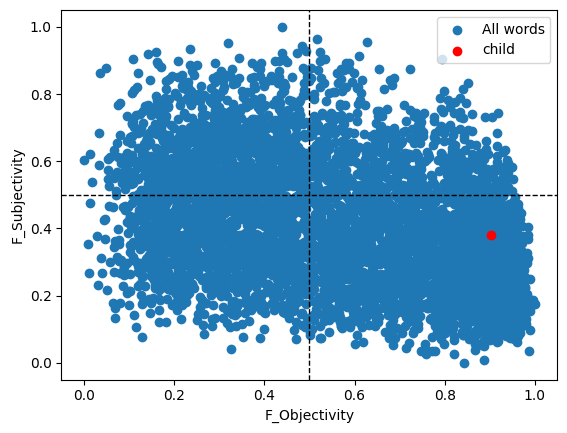

In [156]:
plot_semantics(word)

#### Experimenting with a vector of words

In [152]:
trial = plotly_vector(['pain','suffering','anxiety'])

In [157]:
trial_2 = plotly_vector(['injury','fracture','suffering','anxiety','bruise','wound','hurt','pain','sore'])

In [162]:
trial_2 = plotly_vector(['wound','suffering','anxiety','fear','monster'])

In [166]:
# from_thesis = plotly_vector(['child','human','person'])
from_thesis = plotly_vector(['child','monster','fear'])

## (Backlog) Confirmatory Factor Analysis - CFA

Explanation about CFA...


In [130]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,
                             ModelSpecificationParser)

In [131]:
factors_name

['F_Objectivity', 'F_Subjectivity', 'F_Context']

In [132]:
df_M.head()

AROU_M     VAL_M     DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  \
words                                                                         
abattoir     4.200  5.343117  1.091676  5.455   4.391  2.382  6.760   4.652   
abbey        3.125  1.551920  0.115971  5.906   5.344  3.324  5.177   5.121   
abbreviate   3.273  0.038319  0.030042  3.286   3.177  5.121  5.543   2.667   
abdicate     4.194  3.182742  0.760560  3.367   2.516  3.971  6.233   4.679   
abdication   3.846  2.817514  0.015873  3.292   2.571  3.097  6.407   5.083   

            GEND_M  
words               
abattoir     5.391  
abbey        3.303  
abbreviate   3.971  
abdicate     5.167  
abdication   4.571

In [133]:
model_dict = {"F_Objectivity": ["CNC_M", "IMAG_M"],
              "F_Subjectivity": ["AROU_M","VAL_M","DOM_M","SIZE_M"],
              "F_Context": ["FAM_M","AOA_M","GEND_M"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df_M, model_dict)

In [134]:
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=True)
cfa.fit(df_M.values)

c:\Users\tiago\OneDrive - UNIVALI\PhD\atividades de pesquisa\semantic_factors\.venv\Lib\site-packages\factor_analyzer\confirmatory_factor_analyzer.py:753: UserWarning:

The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH



ConfirmatoryFactorAnalyzer(n_obs=5553,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x000001AC99468350>)

In [135]:
cfa.loadings_

array([[ 5.06606546e-01,  0.00000000e+00,  0.00000000e+00],
       [ 2.26298043e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.04205932e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.40671203e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.30326168e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.20226349e-03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  7.86302447e-01],
       [ 0.00000000e+00,  0.00000000e+00,  5.16277277e-01],
       [ 0.00000000e+00,  0.00000000e+00,  8.89250121e-02]])

In [136]:
cfa.factor_varcovs_

array([[ 1.        , -0.35524903,  0.29482857],
       [-0.35524903,  1.        , -0.66741561],
       [ 0.29482857, -0.66741561,  1.        ]])

In [137]:
cfa.get_standard_errors()

(array([[0.02254619, 0.        , 0.        ],
        [0.08462428, 0.        , 0.        ],
        [0.        , 0.02237992, 0.        ],
        [0.        , 0.01850478, 0.        ],
        [0.        , 0.0153491 , 0.        ],
        [0.        , 0.01327367, 0.        ],
        [0.        , 0.        , 0.02427055],
        [0.        , 0.        , 0.01754778],
        [0.        , 0.        , 0.01581061]]),
 array([0.02495931, 0.36448188, 0.04855741, 0.02564881, 0.02045135,
        0.01760189, 0.03582185, 0.0193635 , 0.01630008]))

In [138]:
cfa_final_scores = pd.DataFrame(cfa.transform(df_M.values), columns=factors_name, index=df_M.index)

In [139]:
cfa_final_scores.head()

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         1.015161       -0.112073   2.594778
abbey           -0.692032        0.537526   1.473696
abbreviate      -1.292290       -1.161050   0.018260
abdicate         0.127799       -1.552300   2.181366
abdication      -0.071105       -1.524113   2.544749

In [140]:
cfa.get_standard_errors()

(array([[0.02254619, 0.        , 0.        ],
        [0.08462428, 0.        , 0.        ],
        [0.        , 0.02237992, 0.        ],
        [0.        , 0.01850478, 0.        ],
        [0.        , 0.0153491 , 0.        ],
        [0.        , 0.01327367, 0.        ],
        [0.        , 0.        , 0.02427055],
        [0.        , 0.        , 0.01754778],
        [0.        , 0.        , 0.01581061]]),
 array([0.02495931, 0.36448188, 0.04855741, 0.02564881, 0.02045135,
        0.01760189, 0.03582185, 0.0193635 , 0.01630008]))

In [141]:
cfa_final_scores.describe()

F_Objectivity  F_Subjectivity     F_Context
count   5.553000e+03    5.553000e+03  5.553000e+03
mean   -1.126018e-16   -2.277627e-16 -2.252035e-16
std     1.078074e+00    1.013591e+00  1.372515e+00
min    -1.442954e+00   -2.191255e+00 -3.748702e+00
25%    -1.060453e+00   -9.056794e-01 -9.749368e-01
50%    -1.705961e-01   -1.254883e-02  7.894022e-02
75%     9.646910e-01    9.840691e-01  1.055870e+00
max     2.447648e+00    1.649141e+00  3.736992e+00

#### Latent variables from CFA

In [142]:

# Standardize the factors
cfa_scaler = MinMaxScaler()
df_cfa = pd.DataFrame(data = cfa_scaler.fit_transform(cfa_final_scores),
                                 index = cfa_final_scores.index,
                                 columns = factors_name)

In [143]:
df_cfa.describe()

F_Objectivity  F_Subjectivity    F_Context
count    5553.000000     5553.000000  5553.000000
mean        0.370882        0.570580     0.500782
std         0.277097        0.263929     0.183352
min         0.000000        0.000000     0.000000
25%         0.098314        0.334751     0.370542
50%         0.327034        0.567313     0.511328
75%         0.618836        0.826822     0.641834
max         1.000000        1.000000     1.000000

In [144]:
df_cfa.head()

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         0.631808        0.541398   0.847414
abbey            0.193009        0.710547   0.697650
abbreviate       0.038725        0.268255   0.503221
abdicate         0.403730        0.166377   0.792187
abdication       0.352606        0.173717   0.840730

In [148]:
plotly_semantics('abattoir', df_factors)

---
## (Backlog) Clustering Analysis

In [130]:
from sklearn.cluster import KMeans

In [131]:
df_cluster = df_factors.copy()

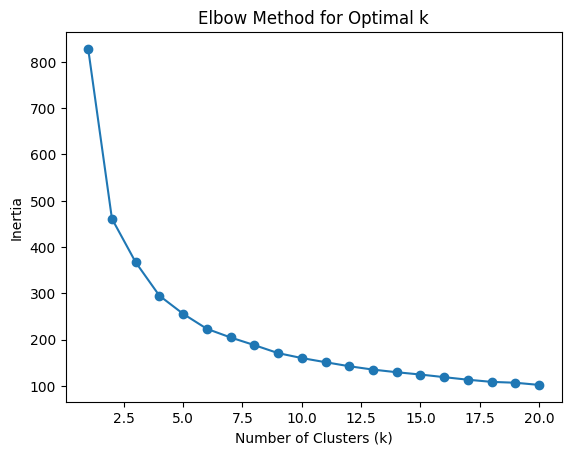

In [132]:
## Defining the number of clusters:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Assuming df_cluster is your DataFrame with the data for clustering

# Set the range of clusters you want to try
num_clusters_range = range(1, 21)  # You can adjust the range based on your dataset

# Initialize an empty list to store the inertia values
inertia_values = []

# Iterate through different numbers of clusters
for num_clusters in num_clusters_range:
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
    kmeans.fit(df_cluster)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Clusterizing only for F_Objectivity and F_Subjectivity (2F - two factors)

In [143]:
# Assuming the DataFrame is loaded as 'scores'
# Standardize the data (important for K-Means)
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(scores)

# Choose the number of clusters (you can adjust this)
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans.fit(df_cluster[['F_Objectivity','F_Subjectivity']])

# Add cluster labels to your DataFrame
df_cluster['Cluster_2F'] = kmeans.labels_

In [144]:
# Create a 3D scatter plot for visualization
fig_cluster = px.scatter(df_cluster, x='F_Objectivity', y='F_Subjectivity', color='Cluster_2F',
                     title='Clustering Results in 2D for 2F', hover_name=df_cluster.index)

# Customize the visualization
fig_cluster.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig_cluster.update_layout(width=800, height=600)

fig_cluster.show()

Observing the graph above, there is no sense in clusterizing the data into 3 clusters, since there is no clear separation between them.

#### Clusterizing for all semantic factors (3F)

In [89]:
# Choose the number of clusters (you can adjust this)
num_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans.fit(df_cluster[['F_Objectivity','F_Subjectivity','F_Context']])

# Add cluster labels to your DataFrame
df_cluster['Cluster_3F'] = kmeans.labels_

In [90]:
# Create a 3D scatter plot for visualization
fig = px.scatter_3d(df_cluster, x='F_Objectivity', y='F_Subjectivity', z='F_Context', color='Cluster_3F',
                    hover_name=df_cluster.index, title='Results for 3-factors clustering')

# Customize the visualization
fig.update_traces(marker=dict(size=4))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=800, height=600)

fig.show()